In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df=pd.read_csv("car_data_missing_values.csv")

In [21]:
df.shape

(301, 9)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    object 
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    object 
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 21.3+ KB


In [23]:
df.describe()

,Selling_Price,Present_Price,Owner
count,301.000000,301.000000,301.000000
mean,4.661296,7.628472,0.043189
std,5.082812,8.644115,0.247915
min,0.100000,0.320000,0.000000
25%,0.900000,1.200000,0.000000
50%,3.600000,6.400000,0.000000
75%,6.000000,9.900000,0.000000
max,35.000000,92.600000,3.000000


In [24]:
df_num = data.select_dtypes(include = np.number)
df_num

,Selling_Price,Present_Price,Owner
0,3.35,5.59,0
1,4.75,9.54,0
2,7.25,9.85,0
3,2.85,4.15,0
4,4.60,6.87,0
...,...,...,...
296,9.50,11.60,0
297,4.00,5.90,0
298,3.35,11.00,0
299,11.50,12.50,0


Text(0.5, 0, 'Selling Price')

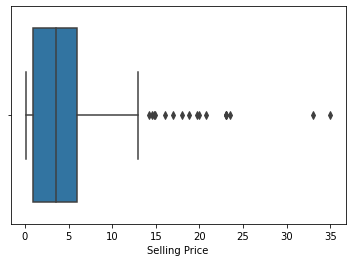

In [25]:
bp_for_sp=sns.boxplot(x=df['Selling_Price'], orient="h", whis=1.5)
bp_for_sp.set_xlabel("Selling Price")

Text(0.5, 0, 'Present Price')

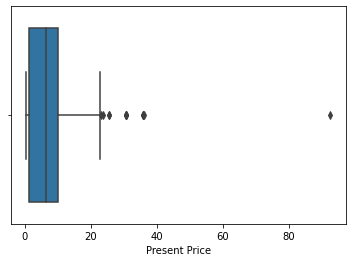

In [26]:
bp_for_pp=sns.boxplot(x=df['Present_Price'], orient="h", whis=1.5)
bp_for_pp.set_xlabel("Present Price")

In [27]:
Q1=df_num.quantile(.25)
Q3=df_num.quantile(.75)
IQR=Q3-Q1
print(IQR)

Selling_Price    5.1
Present_Price    8.7
Owner            0.0
dtype: float64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

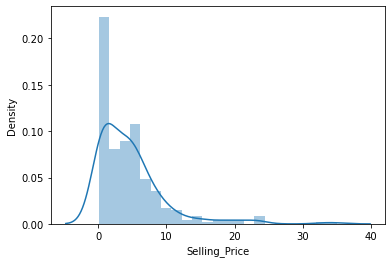

In [28]:
#1. Log Transformations
#Before log transformation (sp feature)
sns.distplot(df_num['Selling_Price'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

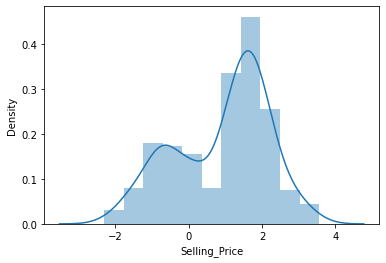

In [18]:
#After Log Transformations (sp)
sp_log= np.log(df_num['Selling_Price'])
sns.distplot(sp_log)

In [29]:
# Quantile based flooring and capping
# Finding upper and lower limit
upper_limit = df_num['Selling_Price'].quantile(0.99)
lower_limit = df_num['Selling_Price'].quantile(0.01)

In [30]:
#Apply Capping and flooring
df_num['Selling_Price'] = np.where(df_num['Selling_Price'] >= upper_limit,
        upper_limit,
        np.where(df_num['Selling_Price'] <= lower_limit,
        lower_limit,
        df_num['Selling_Price']))

<ipython-input-30-399b1fa6027f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['Selling_Price'] = np.where(df_num['Selling_Price'] >= upper_limit,


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

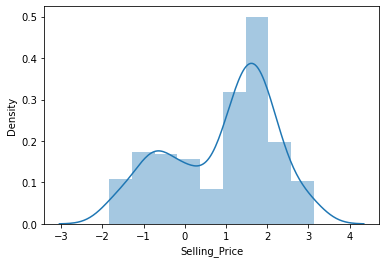

In [31]:
sp_log= np.log(df_num['Selling_Price'])
sns.distplot(sp_log)